# Download
HSC: https://github.com/brianhie/scanorama --> Dataset download (wget http://cb.csail.mit.edu/cb/scanorama/data.tar.gz).

The file "data.tar.gz" (around 4 GB) contains many other datasets, so we save the two used datasets here for convenience:

MARS-seq, https://drive.google.com/file/d/1IJgMt-WR-MTrvrwTgyitxQNJnbf5LKPU/view?usp=sharing.

SMART-seq2, https://drive.google.com/file/d/10-vnu6jJirg0P2F2FCv0jbxuvBKs6dQv/view?usp=sharing.

iPSC: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE122662 (data), https://broadinstitute.github.io/wot/tutorial/ --> Download tutorial input data (meta), https://broadinstitute.github.io/wot/ (wot).

# HSC

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
import anndata2ri
import scipy.io as sio
import anndata as ad

sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.19.2 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.7.0


In [2]:
adata_mars = sc.read_h5ad("./data/adata_mars.h5ad")
adata_ss2 = sc.read_h5ad("./data/adata_ss2.h5ad")

In [3]:
meta_mars = adata_mars.obs
meta_ss2 = adata_ss2.obs

meta = pd.concat([meta_mars, meta_ss2])

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


Finding highly variable genes...


/home/jzhaoaz/.local/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
/home/jzhaoaz/.local/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Normalizing and scaling...


normalizing counts per cell
    finished (0:00:00)


Dimensionality reduction via PCA...
Begining time:  Thu Mar 17 21:49:57 2022
step 0, loss_D=14.978165, loss_GAN=3.535731, loss_AE=340.104797, loss_cos=38.248852, loss_LA=229.768677
step 200, loss_D=2.422872, loss_GAN=4.489627, loss_AE=19.747946, loss_cos=9.117771, loss_LA=4.156684
step 400, loss_D=2.122218, loss_GAN=3.641241, loss_AE=12.982098, loss_cos=7.744566, loss_LA=2.580698
step 600, loss_D=1.467592, loss_GAN=4.086961, loss_AE=9.467205, loss_cos=6.625919, loss_LA=1.608727
step 800, loss_D=1.010298, loss_GAN=4.944103, loss_AE=8.823854, loss_cos=6.020113, loss_LA=1.435752
Ending time:  Thu Mar 17 21:50:26 2022
Training takes 28.65 seconds
Begining time:  Thu Mar 17 21:50:26 2022
Ending time:  Thu Mar 17 21:50:26 2022
Evaluating takes 0.12 seconds
UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation',
     min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1,
     verbose=True)
Construct fuzzy simplicial set
Thu Mar 17 21:50:32 2022 Finding Nearest

/home/jzhaoaz/.conda/envs/scUNIT/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Thu Mar 17 21:50:34 2022 Finished Nearest Neighbor Search
Thu Mar 17 21:50:36 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


... storing 'method' as categorical
... storing 'celltype' as categorical


Thu Mar 17 21:50:47 2022 Finished embedding


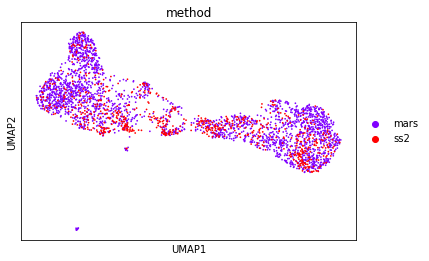

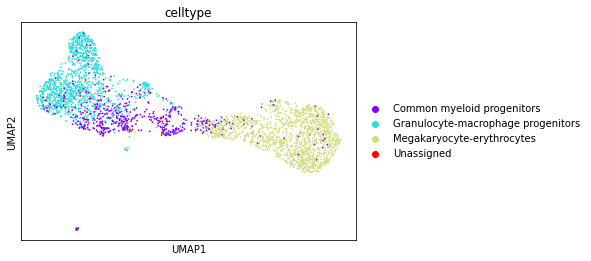

In [4]:
import portal

# Specify the GPU device
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

# Create a folder for saving results
result_path = "./result_hsc"
if not os.path.exists(result_path):
    os.makedirs(result_path)
    
model = portal.model.Model(training_steps=1000, lambdacos=20.0)
model.preprocess(adata_mars, adata_ss2) # perform preprocess and PCA
# model.preprocess(adata_sn, adata_sc, hvg_num=4500) # perform preprocess and PCA
model.train() # train the model
# model.eval(D_score=True) # get integrated latent representation of cells
model.eval()

portal.utils.plot_UMAP(model.latent, meta, colors=["method", "celltype"], save=True, result_path=result_path)

In [5]:
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl
import umap
import anndata
import random

In [6]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_10b = [i for i in get_cmap('Set2').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]

rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_10b = [mpl.colors.rgb2hex(color) for color in rgb_10b]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new

def plot_UMAP(data, meta, space="latent", score=None, colors=["method"], save=False, result_path=None, filename_suffix=None):
    if filename_suffix is not None:
        filenames = [os.path.join(result_path, "%s-%s-%s.pdf" % (space, c, filename_suffix)) for c in colors]
    else:
        filenames = [os.path.join(result_path, "%s-%s.pdf" % (space, c)) for c in colors]
    adata = anndata.AnnData(X=data)
    adata.obs.index = meta.index
    adata.obs = pd.concat([adata.obs, meta], axis=1)
    adata.var.index = "dim-" + adata.var.index
    adata.obsm["latent"] = data
    # run UMAP
    reducer = umap.UMAP(n_neighbors=30,
                        n_components=2,
                        metric="correlation",
                        n_epochs=None,
                        learning_rate=1.0,
                        min_dist=0.3,
                        spread=1.0,
                        set_op_mix_ratio=1.0,
                        local_connectivity=1,
                        repulsion_strength=1,
                        negative_sample_rate=5,
                        a=None,
                        b=None,
                        random_state=1234,
                        metric_kwds=None,
                        angular_rp_forest=False,
                        verbose=True)
    embedding = reducer.fit_transform(adata.obsm["latent"])
    adata.obsm["X_umap"] = embedding
    n_cells = embedding.shape[0]
    if n_cells >= 15000:
        size = 120000 / n_cells
    else:
        size = 8
    for i, c in enumerate(colors):
        groups = sorted(set(adata.obs[c]))
        if "nan" in groups:
            groups.remove("nan")
        if c == "method":
            palette = mpl.rcParams["axes.prop_cycle"]
        else:
            palette = rgb2hex
        return embedding, groups, palette, size

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.19.2 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.7.0


UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation',
     min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1,
     verbose=True)
Construct fuzzy simplicial set


/home/jzhaoaz/.local/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


Thu Mar 17 21:50:53 2022 Finding Nearest Neighbors
Thu Mar 17 21:50:53 2022 Finished Nearest Neighbor Search
Thu Mar 17 21:50:53 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Mar 17 21:51:04 2022 Finished embedding


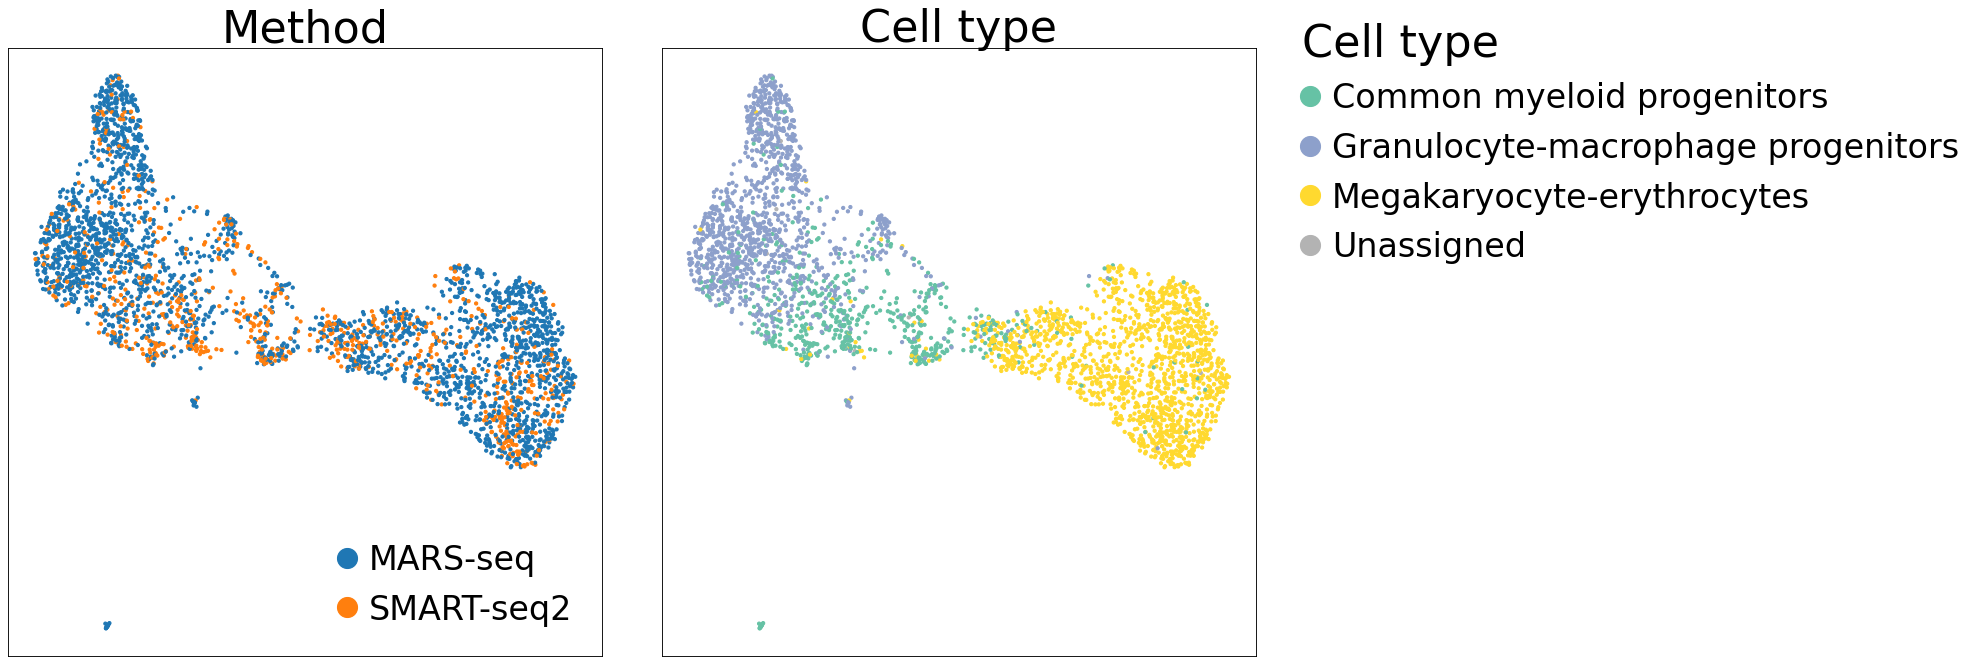

In [7]:
idx = np.arange(meta.shape[0])
random.shuffle(idx)

lowdim = model.latent

meta_sf = meta.iloc[idx, :]
meta_sf["method"][meta_sf.method.values.astype(str) == "mars"] = "MARS-seq"
meta_sf["method"][meta_sf.method.values.astype(str) == "ss2"] = "SMART-seq2"

meta_sf["celltype"][meta_sf.method.values.astype(str) == "Megakaryocyte–erythrocytes"] = "Megakaryocyte–erythroid progenitors"


le = preprocessing.LabelEncoder()
le.fit(sorted(set(meta_sf["method"])))
label = le.fit_transform(meta_sf["method"].values)
colours = ListedColormap(["tab:blue", "tab:orange"])

le2 = preprocessing.LabelEncoder()
le2.fit(sorted(set(meta_sf["celltype"])))
label2 = le.fit_transform(meta_sf["celltype"].values)
colours2 = ListedColormap(rgb2hex_10b)


f = plt.figure(figsize=(20,10))

# Ours method
ax2 = f.add_subplot(1,2,1)
n_cells = lowdim.shape[0]
size = 120000 / n_cells
embedding, groups, palette, size = plot_UMAP(lowdim, meta, space="latent", colors=["method"], save=False, result_path="results_TM_full")
embedding_sf = embedding[idx, :]

scatter1 = ax2.scatter(embedding_sf[:, 0], embedding_sf[:, 1], s=size, c=label, cmap=colours, label=meta_sf["method"].values)
ax2.set_title("Method", fontsize=40)
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax2.legend(handles=scatter1.legend_elements(num=len(sorted(set(meta_sf["method"]))))[0], labels=sorted(set(meta_sf["method"])), loc="lower right", bbox_to_anchor=(1.0, 0.0), 
           markerscale=3., title_fontsize=40, fontsize=30, frameon=False, ncol=1, title=None)

# celltype
ax22 = f.add_subplot(1,2,2)
scatter2 = ax22.scatter(embedding_sf[:, 0], embedding_sf[:, 1], s=size, c=label2, cmap=colours2)#, label=meta["tissue"].values)
ax22.set_title("Cell type", fontsize=40)
ax22.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

l2 = f.legend(handles=scatter2.legend_elements(num=len(sorted(set(meta_sf["celltype"])))-1)[0], labels=sorted(set(meta_sf["celltype"])), loc="upper left", bbox_to_anchor=(0.97, 0.98), 
              markerscale=3., title_fontsize=40, fontsize=30, frameon=False, ncol=1, title="Cell type")
l2._legend_box.align = "left"
f.subplots_adjust(hspace=.1, wspace=.1)
f.savefig("trajectory-hsc.png", bbox_inches='tight', dpi=150)

# iPSC

In [8]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy.io as io
import anndata
import wot
import glob, os

In [9]:
# Path to input files
BATCH_PATH ='./data_ipsc/data/batches.txt'
FLE_COORDS_PATH ='./data_ipsc/data/fle_coords.txt'
FULL_DS_PATH = './data_ipsc/data/ExprMatrix.h5ad'
VAR_DS_PATH = './data_ipsc/data/ExprMatrix.var.genes.h5ad'
CELL_DAYS_PATH = './data_ipsc/data/cell_days.txt'
GENE_SETS_PATH = './data_ipsc/data/gene_sets.gmx'
GENE_SET_SCORES_PATH = './data_ipsc/data/gene_set_scores.csv'
CELL_SETS_PATH = './data_ipsc/data/cell_sets.gmt'

In [10]:
os.chdir("./data_ipsc/ipsc")
file_name_list = []
for file in glob.glob("*_gene_bc_mat.h5"):
    file_name_list.append(file)

In [11]:
for n, file in enumerate(file_name_list):
    print(file[len('GSM3195648_'):])
    adata_new = sc.read_10x_h5(file)
    adata_new.obs.index = file[len('GSM3195683_'):-len('gene_bc_mat.h5')] + adata_new.obs.index
    adata_new.var_names_make_unique()
    if n == 0:
        adata_all = adata_new.copy()
    else:
        adata_all = adata_all.concatenate(adata_new, index_unique=None)

reading GSM3477269_D15_serum_GDF9_exp_R1_C1_gene_bc_mat.h5


D15_serum_GDF9_exp_R1_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477286_D15_serum_GDF9_ctrl_R2_C3_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_ctrl_R2_C3_gene_bc_mat.h5


reading GSM3195661_D3_Dox_C2_gene_bc_mat.h5


D3_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195677_D7_Dox_C2_gene_bc_mat.h5


D7_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195768_D18_serum_C1_gene_bc_mat.h5


D18_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195758_D17_2i_C1_gene_bc_mat.h5


D17_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195736_D14_serum_C1_gene_bc_mat.h5


D14_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195755_D16.5_2i_C2_gene_bc_mat.h5


D16.5_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195750_D16_2i_C1_gene_bc_mat.h5


D16_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195652_D1_Dox_C1_gene_bc_mat.h5


D1_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195717_D11.5_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11.5_serum_C2_gene_bc_mat.h5


reading GSM3195674_D6.5_Dox_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D6.5_Dox_C1_gene_bc_mat.h5


reading GSM3195712_D11_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11_serum_C1_gene_bc_mat.h5


reading GSM3477284_D15_serum_GDF9_ctrl_R2_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_ctrl_R2_C1_gene_bc_mat.h5


reading GSM3195714_D11.5_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11.5_2i_C1_gene_bc_mat.h5


reading GSM3195764_D17.5_serum_C1_gene_bc_mat.h5


D17.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195724_D12.5_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12.5_serum_C1_gene_bc_mat.h5


reading GSM3195693_D8.75_serum_C2_gene_bc_mat.h5


D8.75_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195671_D5.5_Dox_C2_gene_bc_mat.h5


D5.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195741_D14.5_serum_C2_gene_bc_mat.h5


D14.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195672_D6_Dox_C1_gene_bc_mat.h5


D6_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195649_D0_Dox_C2_gene_bc_mat.h5


D0_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195685_D8.25_serum_C2_gene_bc_mat.h5


D8.25_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195663_D3.5_Dox_C2_gene_bc_mat.h5


D3.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195733_D13.5_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13.5_serum_C2_gene_bc_mat.h5


reading GSM3195743_D15_2i_C2_gene_bc_mat.h5


D15_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195662_D3.5_Dox_C1_gene_bc_mat.h5


D3.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195766_D18_2i_C1_gene_bc_mat.h5


D18_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195703_D10_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10_2i_C2_gene_bc_mat.h5


reading GSM3195763_D17.5_2i_C2_gene_bc_mat.h5


D17.5_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477272_D15_serum_GDF9_exp_R2_C1_gene_bc_mat.h5


D15_serum_GDF9_exp_R2_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477278_D15_serum_GDF9_exp_R4_C1_gene_bc_mat.h5


D15_serum_GDF9_exp_R4_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195684_D8.25_serum_C1_gene_bc_mat.h5


D8.25_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195692_D8.75_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D8.75_serum_C1_gene_bc_mat.h5


reading GSM3195749_D15.5_serum_C2_gene_bc_mat.h5


D15.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195761_D17_serum_C2_gene_bc_mat.h5


D17_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195668_D5_Dox_C1_gene_bc_mat.h5


D5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477283_D15_serum_GDF9_ctrl_R1_C3_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_ctrl_R1_C3_gene_bc_mat.h5


reading GSM3195687_D8.5_2i_C2_gene_bc_mat.h5


D8.5_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477290_D15_serum_GDF9_ctrl_R4_C1_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R4_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195708_D10.5_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10.5_serum_C1_gene_bc_mat.h5


reading GSM3195665_D4_Dox_C2_gene_bc_mat.h5


D4_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195756_D16.5_serum_C1_gene_bc_mat.h5


D16.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195679_D7.5_Dox_C2_gene_bc_mat.h5


D7.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195650_D0.5_Dox_C1_gene_bc_mat.h5


D0.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477285_D15_serum_GDF9_ctrl_R2_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_ctrl_R2_C2_gene_bc_mat.h5


reading GSM3195680_D8_Dox_C1_gene_bc_mat.h5


D8_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195676_D7_Dox_C1_gene_bc_mat.h5


D7_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477274_D15_serum_GDF9_exp_R2_C3_gene_bc_mat.h5


D15_serum_GDF9_exp_R2_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195710_D11_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11_2i_C1_gene_bc_mat.h5


reading GSM3195707_D10.5_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10.5_2i_C2_gene_bc_mat.h5


reading GSM3195739_D14.5_2i_C2_gene_bc_mat.h5


D14.5_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195744_D15_serum_C1_gene_bc_mat.h5


D15_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195728_D13_serum_C1_gene_bc_mat.h5


D13_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195696_D9_serum_C1_gene_bc_mat.h5


D9_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195722_D12.5_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12.5_2i_C1_gene_bc_mat.h5


reading GSM3195690_D8.75_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D8.75_2i_C1_gene_bc_mat.h5


reading GSM3195675_D6.5_Dox_C2_gene_bc_mat.h5


D6.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195721_D12_serum_C2_gene_bc_mat.h5


D12_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195745_D15_serum_C2_gene_bc_mat.h5


D15_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195716_D11.5_serum_C1_gene_bc_mat.h5


D11.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195694_D9_2i_C1_gene_bc_mat.h5


D9_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195706_D10.5_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10.5_2i_C1_gene_bc_mat.h5


reading GSM3195700_D9.5_serum_C1_gene_bc_mat.h5


D9.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195727_D13_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13_2i_C2_gene_bc_mat.h5


reading GSM3195691_D8.75_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D8.75_2i_C2_gene_bc_mat.h5


reading GSM3477275_D15_serum_GDF9_exp_R3_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_exp_R3_C1_gene_bc_mat.h5


reading GSM3195673_D6_Dox_C2_gene_bc_mat.h5


D6_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195701_D9.5_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D9.5_serum_C2_gene_bc_mat.h5


reading GSM3195695_D9_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D9_2i_C2_gene_bc_mat.h5


reading GSM3195772_DiPSC_serum_C1_gene_bc_mat.h5


DiPSC_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477270_D15_serum_GDF9_exp_R1_C2_gene_bc_mat.h5


D15_serum_GDF9_exp_R1_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195751_D16_2i_C2_gene_bc_mat.h5


D16_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195655_D1.5_Dox_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D1.5_Dox_C2_gene_bc_mat.h5


reading GSM3195718_D12_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12_2i_C1_gene_bc_mat.h5


reading GSM3195760_D17_serum_C1_gene_bc_mat.h5


D17_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195730_D13.5_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13.5_2i_C1_gene_bc_mat.h5


reading GSM3195682_D8.25_2i_C1_gene_bc_mat.h5


D8.25_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195664_D4_Dox_C1_gene_bc_mat.h5


D4_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195746_D15.5_2i_C1_gene_bc_mat.h5


D15.5_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195699_D9.5_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D9.5_2i_C2_gene_bc_mat.h5


reading GSM3195653_D1_Dox_C2_gene_bc_mat.h5


D1_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195770_DiPSC_2i_C1_gene_bc_mat.h5


DiPSC_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195769_D18_serum_C2_gene_bc_mat.h5


D18_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477271_D15_serum_GDF9_exp_R1_C3_gene_bc_mat.h5


D15_serum_GDF9_exp_R1_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195720_D12_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12_serum_C1_gene_bc_mat.h5


reading GSM3195731_D13.5_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13.5_2i_C2_gene_bc_mat.h5


reading GSM3195754_D16.5_2i_C1_gene_bc_mat.h5


D16.5_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195752_D16_serum_C1_gene_bc_mat.h5


D16_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195651_D0.5_Dox_C2_gene_bc_mat.h5


D0.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195740_D14.5_serum_C1_gene_bc_mat.h5


D14.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195704_D10_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10_serum_C1_gene_bc_mat.h5


reading GSM3195735_D14_2i_C2_gene_bc_mat.h5


D14_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195697_D9_serum_C2_gene_bc_mat.h5


D9_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195729_D13_serum_C2_gene_bc_mat.h5


D13_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477281_D15_serum_GDF9_ctrl_R1_C1_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R1_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195747_D15.5_2i_C2_gene_bc_mat.h5


D15.5_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195723_D12.5_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12.5_2i_C2_gene_bc_mat.h5


reading GSM3195688_D8.5_serum_C1_gene_bc_mat.h5


D8.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477287_D15_serum_GDF9_ctrl_R3_C1_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R3_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195773_DiPSC_serum_C2_gene_bc_mat.h5


DiPSC_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195715_D11.5_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11.5_2i_C2_gene_bc_mat.h5


reading GSM3195726_D13_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13_2i_C1_gene_bc_mat.h5


reading GSM3477276_D15_serum_GDF9_exp_R3_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D15_serum_GDF9_exp_R3_C2_gene_bc_mat.h5


reading GSM3195753_D16_serum_C2_gene_bc_mat.h5


D16_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195648_D0_Dox_C1_gene_bc_mat.h5


D0_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477292_D15_serum_GDF9_ctrl_R4_C3_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R4_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195748_D15.5_serum_C1_gene_bc_mat.h5


D15.5_serum_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195709_D10.5_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10.5_serum_C2_gene_bc_mat.h5


reading GSM3195657_D2_Dox_C2_gene_bc_mat.h5


D2_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195660_D3_Dox_C1_gene_bc_mat.h5


D3_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195725_D12.5_serum_C2_gene_bc_mat.h5


D12.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477273_D15_serum_GDF9_exp_R2_C2_gene_bc_mat.h5


D15_serum_GDF9_exp_R2_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195737_D14_serum_C2_gene_bc_mat.h5


D14_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195765_D17.5_serum_C2_gene_bc_mat.h5


D17.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195738_D14.5_2i_C1_gene_bc_mat.h5


D14.5_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477289_D15_serum_GDF9_ctrl_R3_C3_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R3_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195742_D15_2i_C1_gene_bc_mat.h5


D15_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195670_D5.5_Dox_C1_gene_bc_mat.h5


D5.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195669_D5_Dox_C2_gene_bc_mat.h5


D5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195698_D9.5_2i_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D9.5_2i_C1_gene_bc_mat.h5


reading GSM3195711_D11_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11_2i_C2_gene_bc_mat.h5


reading GSM3195702_D10_2i_C1_gene_bc_mat.h5


D10_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195759_D17_2i_C2_gene_bc_mat.h5


D17_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195771_DiPSC_2i_C2_gene_bc_mat.h5


DiPSC_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195686_D8.5_2i_C1_gene_bc_mat.h5


D8.5_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195659_D2.5_Dox_C2_gene_bc_mat.h5


D2.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195762_D17.5_2i_C1_gene_bc_mat.h5


D17.5_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195666_D4.5_Dox_C1_gene_bc_mat.h5


D4.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195719_D12_2i_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D12_2i_C2_gene_bc_mat.h5


reading GSM3195732_D13.5_serum_C1_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D13.5_serum_C1_gene_bc_mat.h5


reading GSM3195658_D2.5_Dox_C1_gene_bc_mat.h5


D2.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195683_D8.25_2i_C2_gene_bc_mat.h5


D8.25_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477279_D15_serum_GDF9_exp_R4_C2_gene_bc_mat.h5


D15_serum_GDF9_exp_R4_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195667_D4.5_Dox_C2_gene_bc_mat.h5


D4.5_Dox_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477277_D15_serum_GDF9_exp_R3_C3_gene_bc_mat.h5


D15_serum_GDF9_exp_R3_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477291_D15_serum_GDF9_ctrl_R4_C2_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R4_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195734_D14_2i_C1_gene_bc_mat.h5


D14_2i_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195757_D16.5_serum_C2_gene_bc_mat.h5


D16.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195681_D8_Dox_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D8_Dox_C2_gene_bc_mat.h5


reading GSM3195767_D18_2i_C2_gene_bc_mat.h5


D18_2i_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195678_D7.5_Dox_C1_gene_bc_mat.h5


D7.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477288_D15_serum_GDF9_ctrl_R3_C2_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R3_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195656_D2_Dox_C1_gene_bc_mat.h5


D2_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477280_D15_serum_GDF9_exp_R4_C3_gene_bc_mat.h5


D15_serum_GDF9_exp_R4_C3_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195689_D8.5_serum_C2_gene_bc_mat.h5


D8.5_serum_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3477282_D15_serum_GDF9_ctrl_R1_C2_gene_bc_mat.h5


D15_serum_GDF9_ctrl_R1_C2_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195654_D1.5_Dox_C1_gene_bc_mat.h5


D1.5_Dox_C1_gene_bc_mat.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
reading GSM3195713_D11_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D11_serum_C2_gene_bc_mat.h5


reading GSM3195705_D10_serum_C2_gene_bc_mat.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)


D10_serum_C2_gene_bc_mat.h5


In [13]:
os.chdir("../../")

coord_df = pd.read_csv(FLE_COORDS_PATH, index_col='id', sep='\t')
days_df = pd.read_csv(CELL_DAYS_PATH, index_col='id', sep='\t')
batch_df = pd.read_csv(BATCH_PATH, index_col='id', sep='\t')
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH,index_col='id')

# Read expression matrix, cell days, and 2-d coordinates
adata = anndata.read_h5ad(FULL_DS_PATH)

In [14]:
# Load cell sets
cell_sets = wot.io.read_sets(CELL_SETS_PATH)

cells_with_celltype = cell_sets.obs.iloc[np.where(np.sum(cell_sets.X, axis=1) == 1)]
_, y = np.where(cell_sets[cells_with_celltype.index].X == 1)
cell_type = cell_sets[cells_with_celltype.index].var.iloc[y].index

cells_with_celltype["celltype"] = list(cell_type)

/home/jzhaoaz/.conda/envs/scUNIT/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
adata_all = adata_all[adata.obs.index, :]

In [16]:
adata_all.obs = adata_all.obs.join(days_df)
adata_all.obs = adata_all.obs.join(batch_df)
adata_all.obs = adata_all.obs.join(cells_with_celltype)

In [17]:
condition = [i.split('_')[1] for i in list(adata_all.obs.index)]
adata_all.obs['condition'] = condition

In [18]:
adata_1 = adata_all[adata_all.obs.covariate == 1].copy()
adata_2 = adata_all[adata_all.obs.covariate == 2].copy()

In [19]:
import portal
import os

# Specify the GPU device
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

# Create a folder for saving results
result_path = "./result_ipsc"
if not os.path.exists(result_path):
    os.makedirs(result_path)

In [20]:
model = portal.model.Model()
model.preprocess(adata_1, adata_2)
model.train() # train the model
model.eval() # get integrated latent representation of cells

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


Finding highly variable genes...


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell


Normalizing and scaling...


    finished (0:00:01)
/home/jzhaoaz/.local/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:01)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Dimensionality reduction via PCA...
Begining time:  Thu Mar 17 22:04:44 2022
step 0, loss_D=16.514490, loss_GAN=3.727717, loss_AE=507.028137, loss_cos=39.581474, loss_LA=393.897278
step 200, loss_D=3.520035, loss_GAN=4.142097, loss_AE=20.468550, loss_cos=5.829911, loss_LA=6.949857
step 400, loss_D=2.477419, loss_GAN=2.790562, loss_AE=11.581861, loss_cos=2.824202, loss_LA=3.323286
step 600, loss_D=2.385641, loss_GAN=2.266785, loss_AE=8.354264, loss_cos=1.510459, loss_LA=2.022835
step 800, loss_D=2.388925, loss_GAN=2.146096, loss_AE=7.243320, loss_cos=1.153111, loss_LA=1.554134
step 1000, loss_D=2.484902, loss_GAN=1.964304, loss_AE=6.362666, loss_cos=0.919905, loss_LA=1.193408
step 1200, loss_D=2.419374, loss_GAN=2.008772, loss_AE=5.750695, loss_cos=0.805125, loss_LA=1.026750
step 1400, loss_D=2.556049, loss_GAN=1.985595, loss_AE=5.386905, loss_cos=0.801857, loss_LA=0.856348
step 1600, loss_D=2.535667, loss_GAN=1.813299, loss_AE=5.073967, loss_cos=0.667393, loss_LA=0.782327
step 1800, lo

In [21]:
meta = pd.concat([adata_1.obs, adata_2.obs])

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation',
     min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1,
     verbose=True)
Construct fuzzy simplicial set
Thu Mar 17 22:05:33 2022 Finding Nearest Neighbors
Thu Mar 17 22:05:33 2022 Building RP forest with 30 trees
Thu Mar 17 22:05:44 2022 NN descent for 18 iterations
	 0  /  18
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
Thu Mar 17 22:08:27 2022 Finished Nearest Neighbor Search
Thu Mar 17 22:08:36 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Mar 17 22:15:12 2022 Finished embedding


... storing 'batch' as categorical
... storing 'celltype' as categorical
... storing 'condition' as categorical


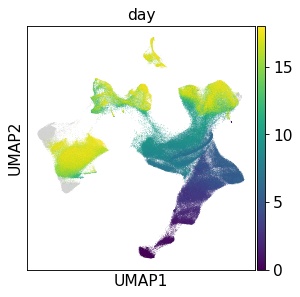

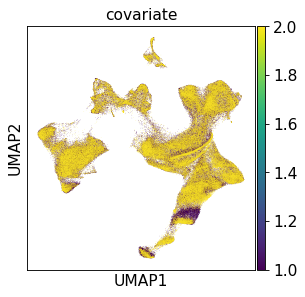

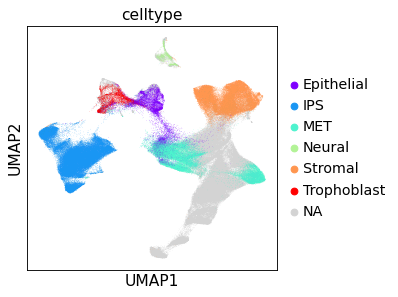

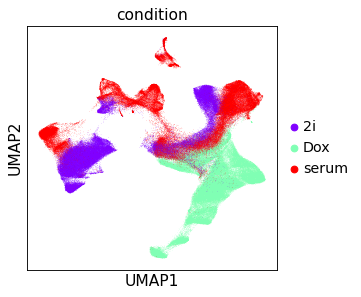

In [22]:
portal.utils.plot_UMAP(model.latent, meta, colors=['day', 'covariate', 'celltype', 'condition'], save=True, result_path=result_path)